In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

d:\sorf\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
iris = pd.read_csv("../data/Iris.txt",names=['a','b','c','d','class'])
iris['class'][iris['class']=="Iris-setosa"] = 0
iris['class'][iris['class']=="Iris-versicolor"] = 0.5
iris['class'][iris['class']=="Iris-virginica"] = 1

d:\sorf\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
d:\sorf\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
d:\sorf\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [3]:
iris.head()

a    b    c    d class
0  5.1  3.5  1.4  0.2     0
1  4.9  3.0  1.4  0.2     0
2  4.7  3.2  1.3  0.2     0
3  4.6  3.1  1.5  0.2     0
4  5.0  3.6  1.4  0.2     0

In [4]:
iris_class1 = iris[iris["class"]==0]
iris_class2 = iris[iris["class"]==0.5]
iris_class3 = iris[iris["class"]==1]

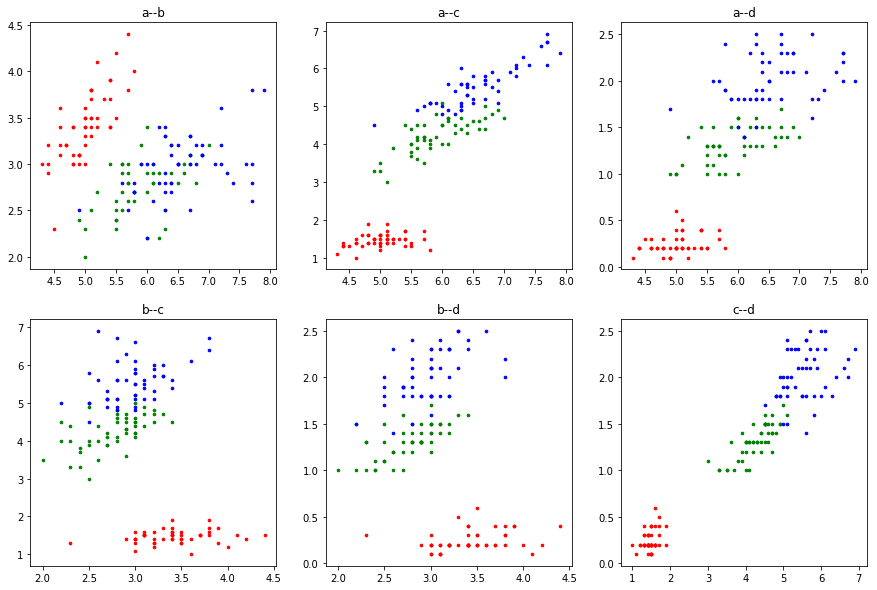

In [5]:
import itertools
plt.figure(figsize=(15,10))
t = 1
for i,j in list(itertools.combinations('abcd',2)):
    plt.subplot(2,3,t)    
    plt.scatter(iris_class1[i],iris_class1[j],7,c='r')
    plt.scatter(iris_class2[i],iris_class2[j],7,c='g')
    plt.scatter(iris_class3[i],iris_class3[j],7,c='b')
    plt.title(i+"--"+j)
    t+=1

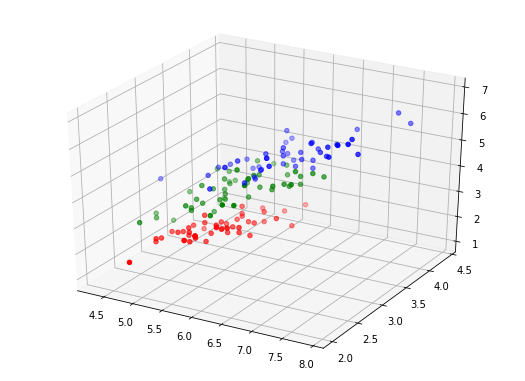

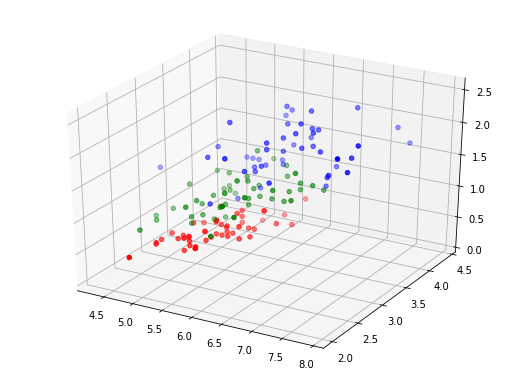

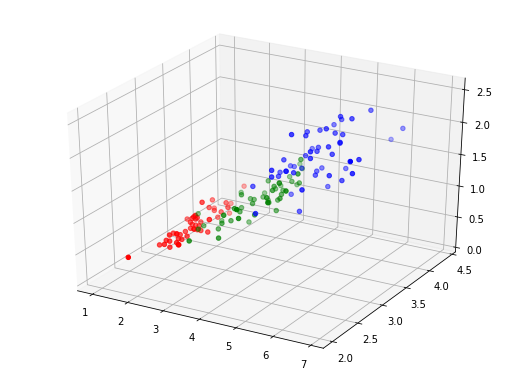

In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(7,5))
ax = Axes3D(fig)
ax.scatter(iris_class1['a'],iris_class1['b'],iris_class1['c'],c='r')
ax.scatter(iris_class2['a'],iris_class2['b'],iris_class2['c'],c='g')
ax.scatter(iris_class3['a'],iris_class3['b'],iris_class3['c'],c='b')

fig = plt.figure(figsize=(7,5))
ax = Axes3D(fig)
ax.scatter(iris_class1['a'],iris_class1['b'],iris_class1['d'],c='r')
ax.scatter(iris_class2['a'],iris_class2['b'],iris_class2['d'],c='g')
ax.scatter(iris_class3['a'],iris_class3['b'],iris_class3['d'],c='b')

fig = plt.figure(figsize=(7,5))
ax = Axes3D(fig)
ax.scatter(iris_class1['c'],iris_class1['b'],iris_class1['d'],c='r')
ax.scatter(iris_class2['c'],iris_class2['b'],iris_class2['d'],c='g')
ax.scatter(iris_class3['c'],iris_class3['b'],iris_class3['d'],c='b')

### 开始建模

In [7]:
temp = np.array(iris)
train_data = np.delete(temp,range(len(temp))[::3],axis=0)
test_data = temp[::3,:]

In [8]:
"""
添加神经网络层的函数
inputs -- 输入内容
in_size -- 输入尺寸
out_size -- 输出尺寸
activation_function --- 激励函数，可以不用输入
"""
def add_layer(inputs,in_size,out_size,activation_function=None):
    W = tf.Variable(tf.zeros([in_size,out_size])+0.01)   #定义，in_size行,out_size列的矩阵,随机矩阵，全为0效果不佳
    b = tf.Variable(tf.zeros([1,out_size])+0.01)              #不建议为0
    Wx_plus_b = tf.matmul(inputs,W) + b                # WX + b
    if activation_function is None:                               #如果有激励函数就激励，否则直接输出
        output = Wx_plus_b
    else:
        output = activation_function(Wx_plus_b)
    return output

In [9]:
X = tf.placeholder(tf.float32,[None,4])
Y = tf.placeholder(tf.float32,[None,1])


output1 = add_layer(X,4,8,activation_function = tf.nn.sigmoid)
output2 = add_layer(output1,8,3,activation_function = tf.nn.sigmoid)
temp_y = add_layer(output2,3,1,activation_function = tf.nn.sigmoid)
loss = tf.reduce_mean(tf.reduce_sum(tf.square(Y-temp_y),
                                        reduction_indices=[1]))#先求平方，再求和，在求平均

train_step = tf.train.AdamOptimizer(0.005).minimize(loss)#通过优化器，以0.1的学习率，减小误差loss

In [10]:
# train_x = iris[['a','b','c']]
# train_y = iris[['class']]

#拆分训练集数据集，分为输入和输出
train_x = train_data[:,:4]
train_y = train_data[:,-1:]

sess = tf.Session()
sess.run(tf.global_variables_initializer())
save_process = []
for i in range(90000):#训练90000次
    sess.run(train_step,feed_dict={X:train_x,Y:train_y})
    if i%300 == 0:#每300次记录损失值（偏差值）
        save_process.append(sess.run(loss,feed_dict={X:train_x,Y:train_y}))

In [11]:
save_process

[0.16747732,
 0.029784458,
 0.01683438,
 0.013181925,
 0.011721387,
 0.0109601915,
 0.0104977945,
 0.010189905,
 0.009970093,
 0.009808748,
 0.009684912,
 0.009592015,
 0.0095117185,
 0.009450015,
 0.009399118,
 0.009356725,
 0.0093215685,
 0.009291811,
 0.009266418,
 0.009313018,
 0.009226717,
 0.009210637,
 0.0091965385,
 0.009190697,
 0.0091736065,
 0.009163814,
 0.009187631,
 0.009147379,
 0.009140145,
 0.009172879,
 0.00912772,
 0.009121929,
 0.009116738,
 0.009111818,
 0.009107241,
 0.009102866,
 0.009116838,
 0.009094963,
 0.009091254,
 0.009087703,
 0.009117853,
 0.009081182,
 0.009078086,
 0.00908959,
 0.009072482,
 0.009069677,
 0.009067062,
 0.009064554,
 0.009062973,
 0.009059882,
 0.009057624,
 0.0090565225,
 0.009062945,
 0.009051352,
 0.009049415,
 0.00904762,
 0.009045641,
 0.0090438565,
 0.009042088,
 0.009121268,
 0.009171627,
 0.0090657165,
 0.009036284,
 0.009035957,
 0.009311904,
 0.009031209,
 0.009029745,
 0.009028326,
 0.00902698,
 0.0090256855,
 0.009024388,
 0

In [12]:
#第前两个数据比较大，踢掉
save_process = np.delete(save_process,[0,1])
plt.plot(range(len(save_process)),save_process)

In [13]:
def compare_numpy(a,b,is_num=False):
    """比较两个维度相同的数组，返回相同数字个数/相似度"""
    num = 0
    for i in range(len(a)):
        if a[i]==b[i]:
            num+=1
    return num if is_num else num/len(a)

In [14]:
test_x = test_data[:,:4]
test_y = test_data[:,-1:]

result = sess.run(temp_y,feed_dict={X:test_x})
result[result > 0.8] = 1
result[result < 0.2] = 0
result[(result < 0.8) & ( result > 0.2)] = 0.5

print("总数:",len(test_data),"     准确个数：",compare_numpy(result,test_y,True),"         精确度：",compare_numpy(result,test_y))

总数: 50      准确个数： 49          精确度： 0.98
